# Abalone

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
%matplotlib inline

In [2]:
data=pd.read_csv("abalone.data.csv")

In [3]:
data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
data.tail()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
M         4176 non-null object
0.455     4176 non-null float64
0.365     4176 non-null float64
0.095     4176 non-null float64
0.514     4176 non-null float64
0.2245    4176 non-null float64
0.101     4176 non-null float64
0.15      4176 non-null float64
15        4176 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.7+ KB


In [6]:
data["M"].unique()

array(['M', 'F', 'I'], dtype=object)

In [7]:
data.corr()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0.455,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
0.365,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
0.095,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
0.514,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
0.2245,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
0.101,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
0.15,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
15,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


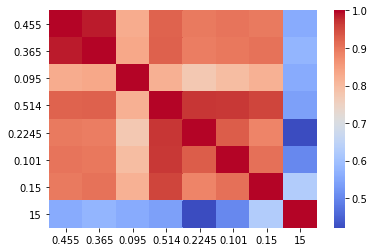

In [8]:
sns.heatmap(data=data.corr(),cmap="coolwarm")

In [9]:
m=pd.get_dummies(data["M"],drop_first=100)

In [10]:
m.head()

,I,M
0,0,1
1,0,0
2,0,1
3,1,0
4,1,0


In [11]:
r=data["M"]
data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [12]:
data.drop("M",axis=1,inplace=True)

In [13]:
data=pd.concat([data,m],axis=1)

In [14]:
data.head()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,I,M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,1,0


In [15]:
label=data["15"]

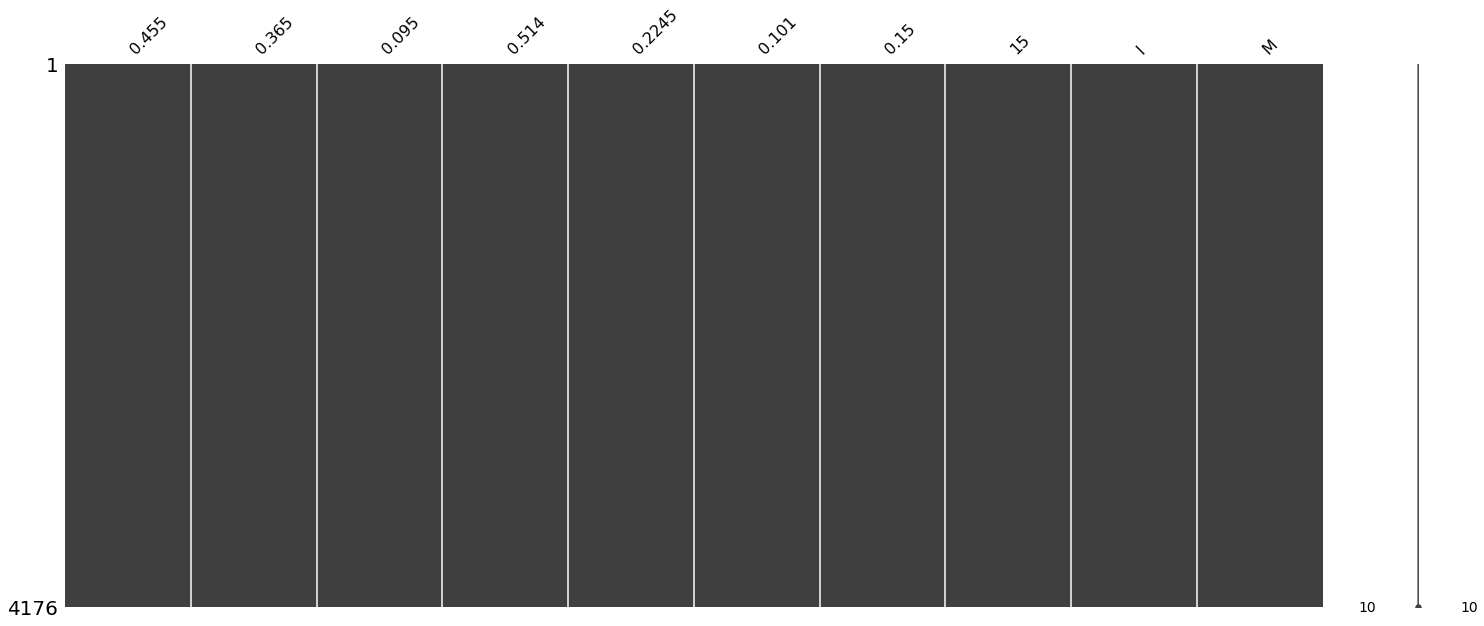

In [16]:
ms.matrix(data)

In [17]:
data.describe()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,I,M
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471,0.321360,0.365661
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601,0.467055,0.481673
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000,1.000000,1.000000


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.drop('15',axis=1), 
                                                    data['15'], test_size=0.30, 
                                                    random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

In [20]:
lin.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
pre=lin.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(pre,Y_test))
print(mean_squared_error(pre,Y_test))
print(np.sqrt(mean_squared_error(pre,Y_test)))

1.56840009367
4.91186513644
2.2162728028


In [27]:
from sklearn.ensemble import RandomForestRegressor
mod=RandomForestRegressor()
mod.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
pred=mod.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(pred,Y_test))
print(mean_squared_error(pred,Y_test))
print(np.sqrt(mean_squared_error(pred,Y_test)))

1.65570630487
5.69819632881
2.38708951001
